<a href="https://colab.research.google.com/github/Shubham-Das-Coder/Machine_Learning_Projects/blob/main/Car_Price_Prediction_Using_Linear_And_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from google.colab import files

In [2]:
#Loading the data from csv to pandas dataframe
data=files.upload()
car_dataset=pd.read_csv('Cardekho_Vehicle_Dataset.csv')

Saving Cardekho_Vehicle_Dataset.csv to Cardekho_Vehicle_Dataset (2).csv


In [3]:
#Displaying the first five rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#Displaying the nymber of rows and columns in the dataset
car_dataset.shape

(301, 9)

In [5]:
#Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#Checking the number of missing values in the dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#Checking the distribution of the categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
#Encoding fuel type
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding seller type
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding transmission
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
#Displaying the first five rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
#Train-test split
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1) #Dropping the 2 columns
Y=car_dataset['Selling_Price'] #Saving the selling price

In [11]:
#Printing X
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [12]:
#Printing Y
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
#Train-test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [14]:
#Loading the linear regression model
lin_reg_model=LinearRegression()

In [15]:
#Training the model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
#Prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [17]:
#R-squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R-squared error : ",error_score)

R-squared error :  0.8799451660493711


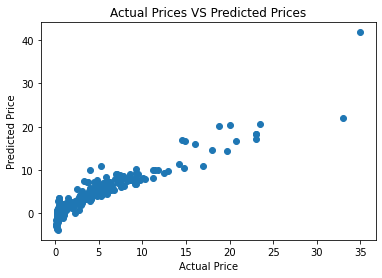

In [18]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices VS Predicted Prices')
plt.show()

In [19]:
#Prediction on testing data
testing_data_prediction=lin_reg_model.predict(X_test)

In [20]:
#R-squared error
error_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R-squared error : ",error_score)

R-squared error :  0.8365766715027051


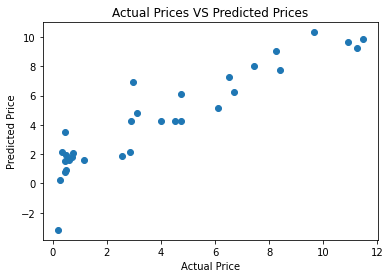

In [21]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices VS Predicted Prices')
plt.show()

In [22]:
#Loading the lasso regression model
las_reg_model=Lasso()

In [23]:
#Training the model
las_reg_model.fit(X_train,Y_train)

Lasso()

In [24]:
#Prediction on training data
training_data_prediction=las_reg_model.predict(X_train)

In [25]:
#R-squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R-squared error : ",error_score)

R-squared error :  0.8427856123435794


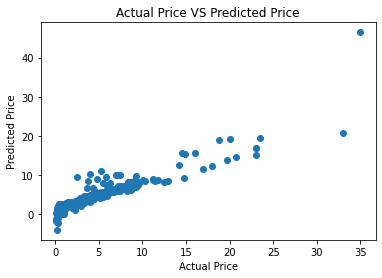

In [26]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

In [27]:
#Prediction on testing data
testing_data_prediction=las_reg_model.predict(X_test)

In [28]:
#R-squared error
error_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R-squared error : ",error_score)

R-squared error :  0.8709167941173195


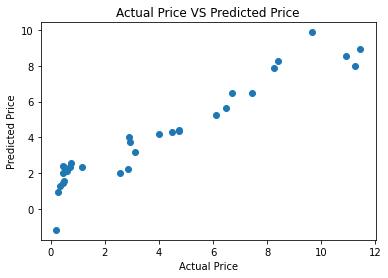

In [29]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()